In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [2]:
# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bhard\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bhard\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# Load the dataset
file_path = r'C:\Users\bhard\OneDrive\Desktop\My all Projects\Sentiment Analysis\Twitter_Data.csv'
df = pd.read_csv(file_path)

In [4]:
# Display basic information about the dataset
print("Columns in DataFrame:")
print(df.columns.tolist())
print("\nShape of DataFrame:")
print(df.shape)
print("\nSample Data:")
print(df.head())

Columns in DataFrame:
['clean_text', 'category']

Shape of DataFrame:
(162980, 2)

Sample Data:
                                          clean_text  category
0  when modi promised “minimum government maximum...      -1.0
1  talk all the nonsense and continue all the dra...       0.0
2  what did just say vote for modi  welcome bjp t...       1.0
3  asking his supporters prefix chowkidar their n...       1.0
4  answer who among these the most powerful world...       1.0


In [5]:
# Data Preprocessing
# Check for missing values
print("\nMissing values in each column:")
print(df.isna().sum())

# Drop rows with missing values in 'clean_text' or 'category'
df.dropna(subset=['clean_text', 'category'], inplace=True)

# Convert 'category' to string if it is not already
df['category'] = df['category'].astype(str)


Missing values in each column:
clean_text    4
category      7
dtype: int64


In [6]:
# Text preprocessing
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words and word.isalpha()]
    return ' '.join(filtered_tokens)

df['clean_text'] = df['clean_text'].apply(preprocess_text)

# Prepare features and target
X = df['clean_text']
y = df['category']

In [7]:
# Vectorize text data
vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

# Train a Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

In [8]:
# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)


Classification Report:
              precision    recall  f1-score   support

        -1.0       0.72      0.63      0.67      7152
         0.0       0.87      0.60      0.71     11067
         1.0       0.68      0.89      0.77     14375

    accuracy                           0.73     32594
   macro avg       0.76      0.71      0.72     32594
weighted avg       0.75      0.73      0.73     32594


Confusion Matrix:
[[ 4491   399  2262]
 [  678  6650  3739]
 [ 1053   568 12754]]


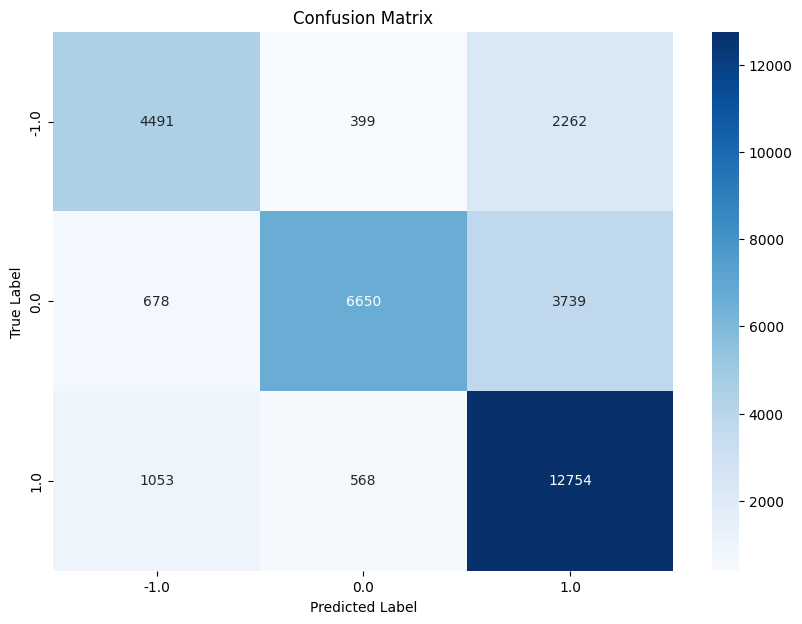

In [9]:
# Visualization
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [10]:
# Example of using the model for new predictions
def predict_sentiment(text):
    text_processed = preprocess_text(text)
    text_vectorized = vectorizer.transform([text_processed])
    prediction = model.predict(text_vectorized)
    return prediction[0]

In [11]:
# Example usage
example_text = "I love the new features in this app!"
print(f"\nSentiment prediction for '{example_text}': {predict_sentiment(example_text)}")

print("Sentiment Analysis Complete.")


Sentiment prediction for 'I love the new features in this app!': 1.0
Sentiment Analysis Complete.
